In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


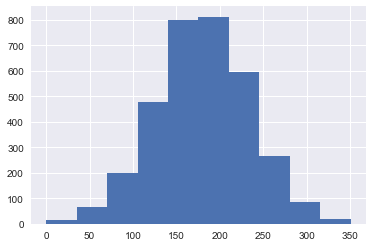

In [8]:
df['Total day minutes'].hist();

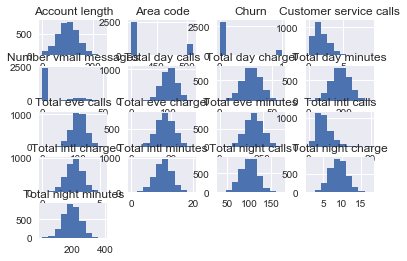

In [5]:
df.hist();

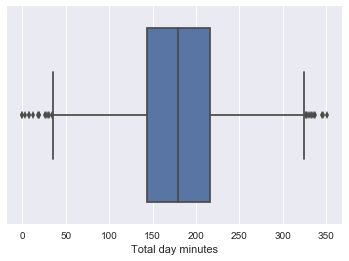

In [9]:
sns.boxplot(df['Total day minutes']);

In [12]:
df['Churn'].value_counts().head()

False    2850
True      483
Name: Churn, dtype: int64

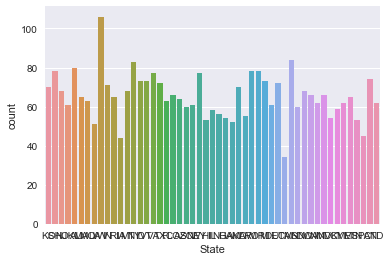

In [14]:
sns.countplot(df['State']);

In [15]:
df['State'].value_counts().head().index

Index(['WV', 'MN', 'NY', 'AL', 'OH'], dtype='object')

In [16]:
df[df['State'].isin(df['State'].value_counts().head().index)]
#isin - означает вхождение индексов

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
62,MN,74,510,No,Yes,33,193.7,91,32.93,246.1,96,20.92,138.0,92,6.21,14.6,3,3.94,2,False
67,MN,113,408,Yes,No,0,125.2,93,21.28,206.4,119,17.54,129.3,139,5.82,8.3,8,2.24,0,False
71,MN,162,510,No,Yes,46,224.9,97,38.23,188.2,84,16.00,254.6,61,11.46,12.1,2,3.27,0,False
75,MN,50,415,No,No,0,157.1,90,26.71,223.3,72,18.98,181.4,111,8.16,6.1,2,1.65,1,False
77,NY,144,408,No,No,0,61.6,117,10.47,77.1,85,6.55,173.0,99,7.79,8.2,7,2.21,4,True


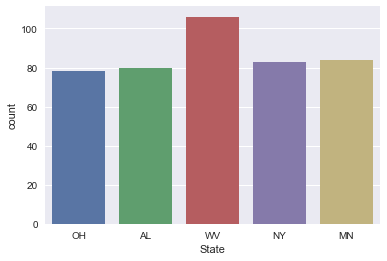

In [19]:
sns.countplot(df[df['State'].\
                 isin(df['State'].value_counts().head().index)]['State']);

In [25]:
feat = [f for f in df.columns if 'charge' in f] 
#проходим по всем признакам и выбираем где есть слово charge



In [27]:
feat

['Total day charge',
 'Total eve charge',
 'Total night charge',
 'Total intl charge']

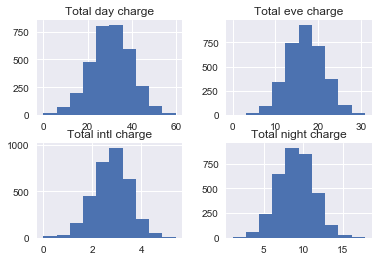

In [29]:
df[feat].hist();

In [23]:
df.columns #колонки

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

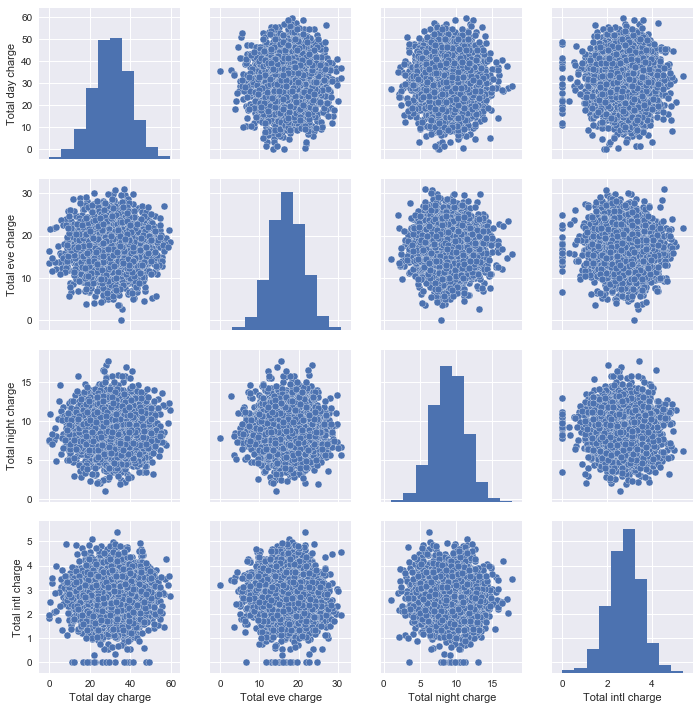

In [30]:
sns.pairplot(df[feat]);

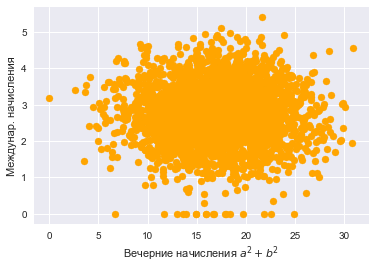

In [42]:
plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color = 'orange');
plt.xlabel(r'Вечерние начисления $a^2 + b^2$')#метка по Х можно с латех
plt.ylabel('Междунар. начисления')#метка по Y

In [41]:
df['Churn'].map({False:'blue', True:'orange'}).head()

0    blue
1    blue
2    blue
3    blue
4    blue
Name: Churn, dtype: object

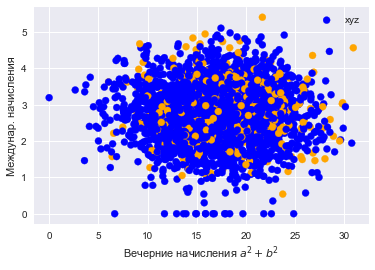

In [47]:


plt.scatter(df['Total eve charge'], df['Total intl charge'],
           color = df['Churn'].map({False:'blue', True:'orange'}),
           label = 'xyz');
plt.xlabel(r'Вечерние начисления $a^2 + b^2$')#метка по Х можно с латех
plt.ylabel('Междунар. начисления')#метка по Y
plt.legend();

In [48]:
df.corr()#корреляция

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
Account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
Area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
Number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
Total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
Total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
Total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
Total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
Total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
Total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
Total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


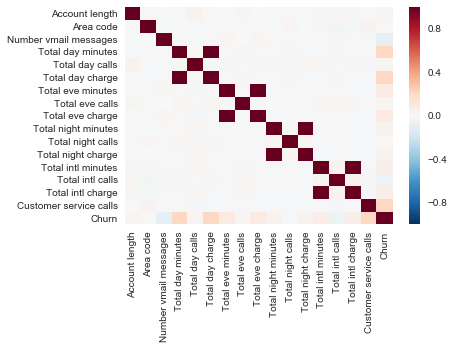

In [50]:
sns.heatmap(df.corr());

In [52]:
df.drop?  #help

In [53]:
df.drop(feat, axis=1, inplace=True)
#inplace=True - если флаг стоит, то РЕАЛЬНО удаляться столбцы